## Dutch Housing Market Price Prediction - Model 

Imports

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

Data Load

In [ ]:
# Load preprocessed data
X_train = pd.read_csv('../preprocessed_data/X_train.csv')
X_val = pd.read_csv('../preprocessed_data/X_val.csv')
X_test = pd.read_csv('../preprocessed_data/X_test.csv')
y_train = pd.read_csv('../preprocessed_data/y_train.csv').values.ravel()
y_val = pd.read_csv('../preprocessed_data/y_val.csv').values.ravel()
y_test = pd.read_csv('../preprocessed_data/y_test.csv').values.ravel()

Models

In [17]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


In [18]:
# Hyperparameter tuning
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [5, 10, 15, None]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
}

# Tune models
tuned_models = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        tuned_models[name] = grid_search.best_estimator_
        print(f"\n{name} best parameters:", grid_search.best_params_)


KNN best parameters: {'n_neighbors': 3}

Decision Tree best parameters: {'max_depth': 5}


/mnt/c/Users/jishn/OneDrive/Bureaublad/Master AI/Machine Learning/code/mlproject/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/mnt/c/Users/jishn/OneDrive/Bureaublad/Master AI/Machine Learning/code/mlproject/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/mnt/c/Users/jishn/OneDrive/Bureaublad/Master AI/Machine Learning/code/mlproject/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwa


Random Forest best parameters: {'max_depth': 10, 'n_estimators': 100}


In [19]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate metrics
    results[name] = {
        'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
        'val_rmse': np.sqrt(mean_squared_error(y_val, val_pred)),
        'train_r2': r2_score(y_train, train_pred),
        'val_r2': r2_score(y_val, val_pred)
    }

/mnt/c/Users/jishn/OneDrive/Bureaublad/Master AI/Machine Learning/code/mlproject/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Linear Regression Results:
Training RMSE: €210,436.51
Validation RMSE: €214,628.29
Training R²: 0.654
Validation R²: 0.587

KNN Results:
Training RMSE: €250,251.28
Validation RMSE: €275,909.81
Training R²: 0.510
Validation R²: 0.317

Decision Tree Results:
Training RMSE: €0.00
Validation RMSE: €290,255.30
Training R²: 1.000
Validation R²: 0.244

Random Forest Results:
Training RMSE: €85,253.58
Validation RMSE: €217,001.29
Training R²: 0.943
Validation R²: 0.578


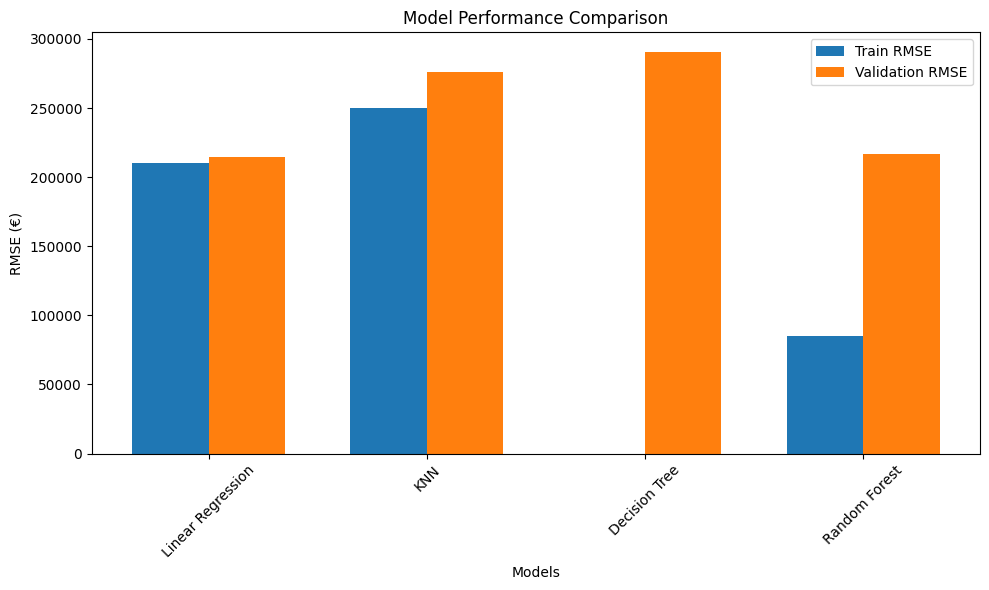

In [20]:
# Print results
for name, metrics in results.items():
    print(f"\n{name} Results:")
    print(f"Training RMSE: €{metrics['train_rmse']:,.2f}")
    print(f"Validation RMSE: €{metrics['val_rmse']:,.2f}")
    print(f"Training R²: {metrics['train_r2']:.3f}")
    print(f"Validation R²: {metrics['val_r2']:.3f}")

# Visualize model comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, [results[m]['train_rmse'] for m in models], width, label='Train RMSE')
plt.bar(x + width/2, [results[m]['val_rmse'] for m in models], width, label='Validation RMSE')

plt.xlabel('Models')
plt.ylabel('RMSE (€)')
plt.title('Model Performance Comparison')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()